In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [58]:
df1=pd.read_csv('D:/newdataset/2016.csv')
df2=pd.read_csv('D:/newdataset/2017.csv')
df3=pd.read_csv('D:/newdataset/2018.csv')
df4=pd.read_csv('D:/newdataset/2019.csv')
df5=pd.read_csv('D:/newdataset/2020.csv')

In [59]:
df=pd.concat([df1, df2, df3, df4, df5], axis=0)

In [60]:
df.shape

(43800, 11)

In [61]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,GHI,Solar Zenith Angle,Relative Humidity,Cloud Type,Clearsky GHI
0,2016,1,1,0,0,12.2,0,172.91,54.06,7,0
1,2016,1,1,1,0,12.1,0,163.29,55.64,7,0
2,2016,1,1,2,0,11.9,0,150.60,57.11,7,0
3,2016,1,1,3,0,11.8,0,137.61,57.76,1,0
4,2016,1,1,4,0,11.8,0,124.68,58.00,3,0


In [62]:
df['GHI1'] = df['GHI'].shift(1)
df['GHI2'] = df['GHI'].shift(2)
df['GHI3'] = df['GHI'].shift(3)
df['GHI4'] = df['GHI'].shift(4)
df['GHI5'] = df['GHI'].shift(5)
df['GHI6'] = df['GHI'].shift(6)

In [63]:
lower_limit = 7
upper_limit = 18
data = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

In [65]:
data.head()

,Year,Month,Day,Hour,Minute,Temperature,GHI,Solar Zenith Angle,Relative Humidity,Cloud Type,Clearsky GHI,GHI1,GHI2,GHI3,GHI4,GHI5,GHI6
7,2016,1,1,7,0,12.8,15,87.46,34.10,7,21,0.0,0.0,0.0,0.0,0.0,0.0
8,2016,1,1,8,0,15.6,110,76.69,33.85,7,189,15.0,0.0,0.0,0.0,0.0,0.0
9,2016,1,1,9,0,18.5,232,67.03,22.85,7,374,110.0,15.0,0.0,0.0,0.0,0.0
10,2016,1,1,10,0,21.3,443,59.29,18.76,3,521,232.0,110.0,15.0,0.0,0.0,0.0
11,2016,1,1,11,0,22.3,417,54.32,16.88,7,570,443.0,232.0,110.0,15.0,0.0,0.0


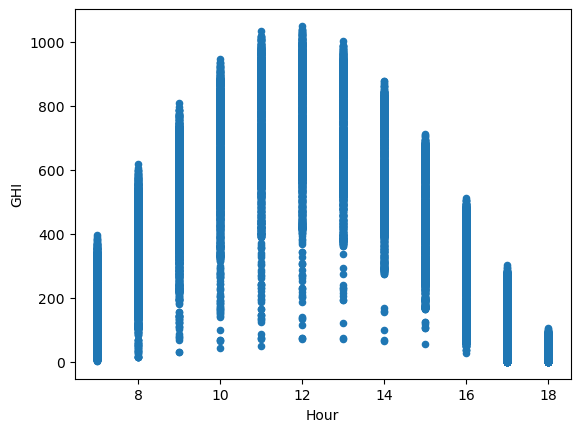

In [66]:
data.plot(kind='scatter', y='GHI', x='Hour')
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Temperature','GHI','Solar Zenith Angle','Relative Humidity','Cloud Type','Clearsky GHI','GHI1','GHI2','GHI3','GHI4','GHI5','GHI6']
scaler = MinMaxScaler()

data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

C:\Users\suraj\AppData\Local\Temp\ipykernel_23252\210008168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


,Year,Month,Day,Hour,Minute,Temperature,GHI,Solar Zenith Angle,Relative Humidity,Cloud Type,Clearsky GHI,GHI1,GHI2,GHI3,GHI4,GHI5,GHI6
7,2016,1,1,7,0,0.192488,0.014286,0.818606,0.313101,0.777778,0.020000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,2016,1,1,8,0,0.258216,0.104762,0.709344,0.310458,0.777778,0.180000,0.014286,0.000000,0.000000,0.000000,0.0,0.0
9,2016,1,1,9,0,0.326291,0.220952,0.611342,0.194142,0.777778,0.356190,0.104762,0.014286,0.000000,0.000000,0.0,0.0
10,2016,1,1,10,0,0.392019,0.421905,0.532819,0.150894,0.333333,0.496190,0.220952,0.104762,0.014286,0.000000,0.0,0.0
11,2016,1,1,11,0,0.415493,0.397143,0.482398,0.131014,0.777778,0.542857,0.421905,0.220952,0.104762,0.014286,0.0,0.0


# Random Forest:

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
X=data[['GHI1','GHI2','GHI3','GHI4','GHI5','GHI6']]
y=data[['GHI']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

scores = cross_val_score(rfr, X_test, y_test, cv=10)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred) 

##GHI(maxvalue) = 1050
##GHI(minvalue) = 0


max_rmse = 1050
min_rmse = 0
original_rmse = rmse_rf * (max_rmse - min_rmse) + min_rmse
print('RMSE: ', original_rmse) 

max_mae = 1050
min_mae = 0
original_mae = mae_rf * (max_mae - min_mae) + min_mae
print('MAE:', original_mae) 

print("R-squared: ", r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_23252\3402321675.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

RMSE:  57.72946643821994
MAE: 30.66404377516683
R-squared:  0.957644201486233


# SVR:

In [73]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

scores = cross_val_score(svr, X_test, y_test, cv=10)
y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

##GHI(maxvalue) = 1050
##GHI(minvalue) = 0

print("Support Vector Regression:")

max_rmse = 1050
min_rmse = 0
original_rmse = rmse_svr * (max_rmse - min_rmse) + min_rmse
print('RMSE: ', original_rmse) 

max_mae = 1050
min_mae = 0
original_mae = mae_svr * (max_mae - min_mae) + min_mae
print('MAE:', original_mae) 

print("R-squared: ", r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Support Vector Regression:
RMSE:  74.38657447604545
MAE: 56.656481619692705
R-squared:  0.9296754590229767


# KNNR:

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

##GHI(maxvalue) = 1050
##GHI(minvalue) = 0

print('K-Nearest Neighbors Regression:')
max_rmse = 1050
min_rmse = 0
original_rmse = rmse_knn * (max_rmse - min_rmse) + min_rmse
print('RMSE: ', original_rmse) 

max_mae = 1050
min_mae = 0
original_mae = mae_knn * (max_mae - min_mae) + min_mae
print('MAE:', original_mae) 

print("R-squared: ", r2_knn)

K-Nearest Neighbors Regression:
RMSE:  57.540732941878524
MAE: 31.27892694063927
R-squared:  0.9579206942797113


# ANN:

In [75]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 1050
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)


C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 58.99508355359791
MAE: 35.92677227282648
R-squared: 0.9557666911606405
